## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 20:52:13.450643: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 20:52:13.549228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 20:52:13.549265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 20:52:13.550516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 20:52:13.567063: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd()) / "implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"ACHE/ache_freq.csv")

nn_data_raw

,Unnamed: 0,INDEX,NAME,Water_Bridge:ASP74A,Hydrophobic_Interaction:TYR341A,Hydrophobic_Interaction:TRP86A,Hydrophobic_Interaction:TRP286A,Hydrophobic_Interaction:PHE338A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR337A,...,Hydrogen_Bond:TYR337A,Water_Bridge:HIS447A,Pi-Stacking:HIS447A,Hydrogen_Bond:GLY122A,Hydrophobic_Interaction:VAL294A,Hydrogen_Bond:TYR133A,Water_Bridge:SER203A,Pi-Stacking:TYR124A,Water_Bridge:ALA204A,LABEL
0,0,1,CHEMBL397271|actives_final|sdf|151,4,1,1,0,1,3,1,...,0,0,0,0,0,0,0,0,0,active
1,1,2,CHEMBL481|actives_final|sdf|20,3,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,active
2,2,3,CHEMBL244230|actives_final|sdf|54,3,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,active
3,3,4,CHEMBL1094633|actives_final|sdf|85,6,1,1,1,1,0,1,...,0,1,0,0,0,0,0,1,0,active
4,4,5,CHEMBL191386|actives_final|sdf|308,4,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,999,CHEMBL576005|actives_final|sdf|279,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,active
999,999,1000,CHEMBL153865|actives_final|sdf|341,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1000,1000,1001,CHEMBL146674|actives_final|sdf|297,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1001,1001,1002,ZINC04195090|decoys_final2|sdf|324,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 3:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-05-06 20:52:18.441766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 20:52:18.555953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 20:52:18.556115: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 20:52:18.574693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 20:52:18.574964: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


2024-05-06 20:52:21.517689: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 20:52:23.107809: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f73984e6a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 20:52:23.107855: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 20:52:23.155192: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 20:52:23.251484: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715021543.626015     658 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36/36 - 5s - loss: 0.7131 - accuracy: 0.5098 - val_loss: 0.7226 - val_accuracy: 0.5248 - 5s/epoch - 145ms/step
Epoch 2/150
36/36 - 0s - loss: 0.6886 - accuracy: 0.5383 - val_loss: 0.7040 - val_accuracy: 0.5319 - 435ms/epoch - 12ms/step
Epoch 3/150
36/36 - 1s - loss: 0.6665 - accuracy: 0.5704 - val_loss: 0.6896 - val_accuracy: 0.5745 - 527ms/epoch - 15ms/step
Epoch 4/150
36/36 - 1s - loss: 0.6465 - accuracy: 0.5989 - val_loss: 0.6742 - val_accuracy: 0.5745 - 548ms/epoch - 15ms/step
Epoch 5/150
36/36 - 1s - loss: 0.6301 - accuracy: 0.6257 - val_loss: 0.6611 - val_accuracy: 0.5957 - 569ms/epoch - 16ms/step
Epoch 6/150
36/36 - 1s - loss: 0.6142 - accuracy: 0.6417 - val_loss: 0.6500 - val_accuracy: 0.5957 - 551ms/epoch - 15ms/step
Epoch 7/150
36/36 - 1s - loss: 0.6009 - accuracy: 0.6667 - val_loss: 0.6405 - val_accuracy: 0.6241 - 639ms/epoch - 18ms/step
Epoch 8/150
36/36 - 1s - loss: 0.5889 - accuracy: 0.6791 - val_loss: 0.6319 - val_accuracy: 0.6312 - 609ms/epoch - 17ms/step
Epoch 9/150
36

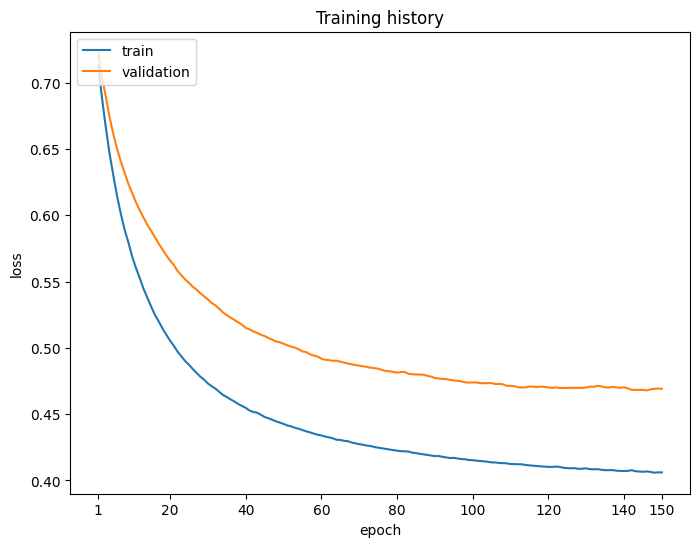

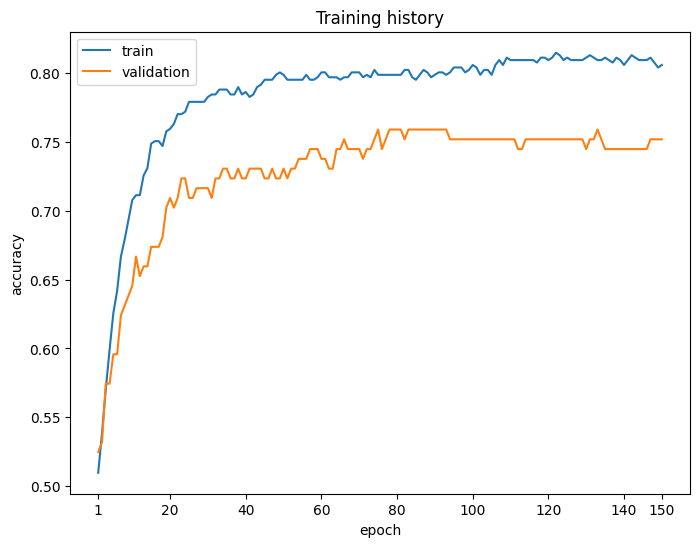

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

In [10]:
df = pd.read_csv(result_dir/"ACHE/val/ache_val.csv",sep=",",index_col="Index")
df.loc[len(df["Name"])] = ["fe_freq_nn",0.718]
df.to_csv(result_dir/"ACHE/val/ache_val.csv",sep=",",index="Index")

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 2ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "ACHE/fe_freq_nn.csv", encoding="utf-8")